<a href="https://colab.research.google.com/github/alejanro85/data_analytics/blob/main/%D1%85%D0%BE%D1%80%D0%BE%D1%88_%D0%B4%D0%BB%D1%8F_ml%2C_%D0%BD%D0%BE_%D0%BC%D0%B0%D0%BB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Разведочный анализ данных и начало машинного обучения



**Цели на буткемп:**

* провести разведочный анализ данных

* построить и проинтерпретировать ML-модель

* обернуть ее в интерактивный веб-сервис

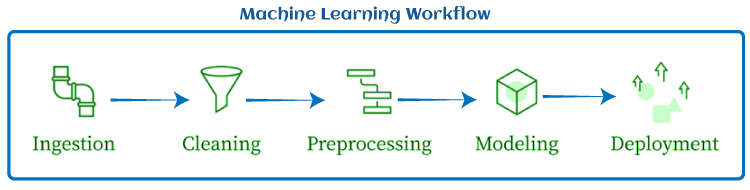

**Цели на сегодня:**

* понять влияние различных факторов (экономических, личных, социальных) на оценки студентов на экзаменах

* научиться делать разведочный анализ данных

* построить первую модель машинного обучения


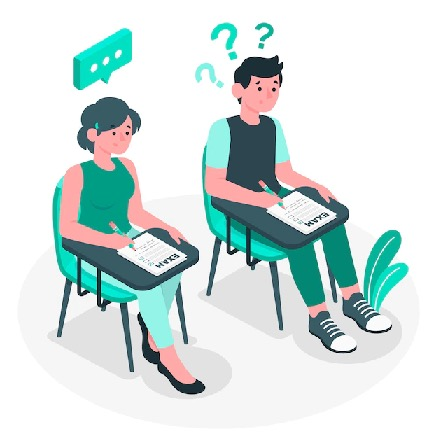

In [38]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

https://www.kaggle.com/datasets/ikynahidwin/depression-student-dataset - тут исходник

In [41]:
df = pd.read_csv("https://raw.githubusercontent.com/alejanro85/data_analytics/refs/heads/main/Depression%20Student%20Dataset.csv")

## Описание данных

* gender - пол студента
* parental level of education - уровень образования родителей
* lunch - вид обеда студента
* class group - в какой группе обучался студент
* test preparation course - проходил ли студент курс для подготовки к экзаменам
* math score - балл за экзамен по математике
* reading score - балл за экзамен по чтению
* writing score (target) - балл за экзамен по письму, целевая переменная

In [42]:
df.head(10)

,Gender,Age,Academic Pressure,Study Satisfaction,Sleep Duration,Dietary Habits,Have you ever had suicidal thoughts ?,Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,Male,28,2.0,4.0,7-8 hours,Moderate,Yes,9,2,Yes,No
1,Male,28,4.0,5.0,5-6 hours,Healthy,Yes,7,1,Yes,No
2,Male,25,1.0,3.0,5-6 hours,Unhealthy,Yes,10,4,No,Yes
3,Male,23,1.0,4.0,More than 8 hours,Unhealthy,Yes,7,2,Yes,No
4,Female,31,1.0,5.0,More than 8 hours,Healthy,Yes,4,2,Yes,No
5,Male,19,4.0,4.0,5-6 hours,Unhealthy,Yes,1,4,Yes,Yes
6,Female,34,4.0,2.0,More than 8 hours,Moderate,Yes,6,2,No,Yes
7,Female,20,4.0,1.0,More than 8 hours,Healthy,Yes,3,4,Yes,Yes
8,Female,33,1.0,4.0,More than 8 hours,Moderate,No,10,3,No,No
9,Male,33,4.0,3.0,Less than 5 hours,Unhealthy,Yes,10,1,No,Yes


## Исследование данных

Размер датасета

In [43]:
df.shape

(502, 11)

Информация о типах данных и пропусках

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 502 entries, 0 to 501
Data columns (total 11 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Gender                                 502 non-null    object 
 1   Age                                    502 non-null    int64  
 2   Academic Pressure                      502 non-null    float64
 3   Study Satisfaction                     502 non-null    float64
 4   Sleep Duration                         502 non-null    object 
 5   Dietary Habits                         502 non-null    object 
 6   Have you ever had suicidal thoughts ?  502 non-null    object 
 7   Study Hours                            502 non-null    int64  
 8   Financial Stress                       502 non-null    int64  
 9   Family History of Mental Illness       502 non-null    object 
 10  Depression                             502 non-null    object 
dtypes: flo

In [45]:
df['Depression'] = df['Depression'].map({'Yes' : 1, 'No' : 0})

In [46]:
X = df.drop(['Sleep Duration','Dietary Habits', 'Depression'], axis=1)




In [47]:
X.shape

(502, 8)

In [48]:
X.head()

,Gender,Age,Academic Pressure,Study Satisfaction,Have you ever had suicidal thoughts ?,Study Hours,Financial Stress,Family History of Mental Illness
0,Male,28,2.0,4.0,Yes,9,2,Yes
1,Male,28,4.0,5.0,Yes,7,1,Yes
2,Male,25,1.0,3.0,Yes,10,4,No
3,Male,23,1.0,4.0,Yes,7,2,Yes
4,Female,31,1.0,5.0,Yes,4,2,Yes


In [49]:
y = df['Depression'] # целевая переменная (target)

In [50]:
X['Gender'] = X['Gender'].map({'Male' : 1, 'Female' : 0})


In [51]:
X['Have you ever had suicidal thoughts ?'] = X['Have you ever had suicidal thoughts ?'].map({'Yes' : 1, 'No' : 0})
X['Family History of Mental Illness'] = X['Family History of Mental Illness'].map({'Yes' : 1, 'No' : 0})


In [52]:
X.head()

,Gender,Age,Academic Pressure,Study Satisfaction,Have you ever had suicidal thoughts ?,Study Hours,Financial Stress,Family History of Mental Illness
0,1,28,2.0,4.0,1,9,2,1
1,1,28,4.0,5.0,1,7,1,1
2,1,25,1.0,3.0,1,10,4,0
3,1,23,1.0,4.0,1,7,2,1
4,0,31,1.0,5.0,1,4,2,1


In [53]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 502 entries, 0 to 501
Data columns (total 8 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Gender                                 502 non-null    int64  
 1   Age                                    502 non-null    int64  
 2   Academic Pressure                      502 non-null    float64
 3   Study Satisfaction                     502 non-null    float64
 4   Have you ever had suicidal thoughts ?  502 non-null    int64  
 5   Study Hours                            502 non-null    int64  
 6   Financial Stress                       502 non-null    int64  
 7   Family History of Mental Illness       502 non-null    int64  
dtypes: float64(2), int64(6)
memory usage: 31.5 KB


In [54]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

X_train.shape, X_test.shape

((376, 8), (126, 8))

In [55]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()

model.fit(X_train, y_train)

pred = model.predict(X_test)

In [56]:
pred[:10]

array([0, 1, 1, 0, 0, 0, 0, 1, 1, 0])

In [57]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, pred)

array([[58,  1],
       [ 3, 64]])

In [58]:
model.coef_

array([[ 0.19084548, -0.31739633,  1.70277648, -1.09739031,  4.75507038,
         0.32604081,  1.05463656,  0.84421947]])

Основные числовые характеристики

In [ ]:
df.describe()

,Age,Academic Pressure,Study Satisfaction,Study Hours,Financial Stress
count,502.000000,502.000000,502.000000,502.000000,502.000000
mean,26.241036,3.003984,3.075697,6.404382,2.928287
std,4.896501,1.390007,1.373490,3.742434,1.425053
min,18.000000,1.000000,1.000000,0.000000,1.000000
25%,22.000000,2.000000,2.000000,3.000000,2.000000
50%,26.500000,3.000000,3.000000,7.000000,3.000000
75%,30.000000,4.000000,4.000000,10.000000,4.000000
max,34.000000,5.000000,5.000000,12.000000,5.000000


In [ ]:
df.describe(include='object')

,Gender,Sleep Duration,Dietary Habits,Have you ever had suicidal thoughts ?,Family History of Mental Illness,Depression
count,502,502,502,502,502,502
unique,2,4,3,2,2,2
top,Male,7-8 hours,Moderate,Yes,No,Yes
freq,267,128,172,260,265,252


## Однофакторный анализ

## Math score, reading score

* в оценках есть пропуски

* есть некорректные оценки (меньше 0)

Посмотрим на распределение оценок

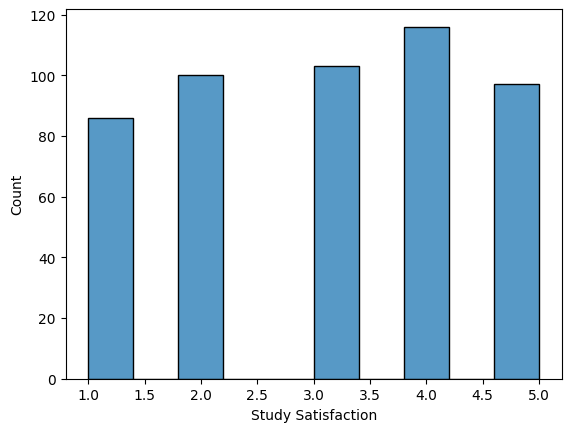

In [ ]:
sns.histplot(df['Study Satisfaction'])
plt.show()

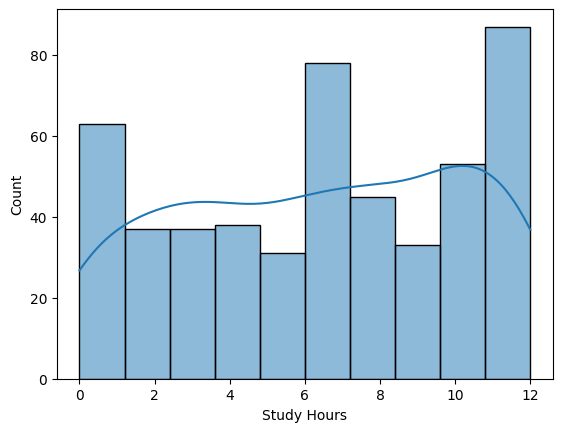

In [ ]:
sns.histplot(df['Study Hours'], kde=True)
plt.show()

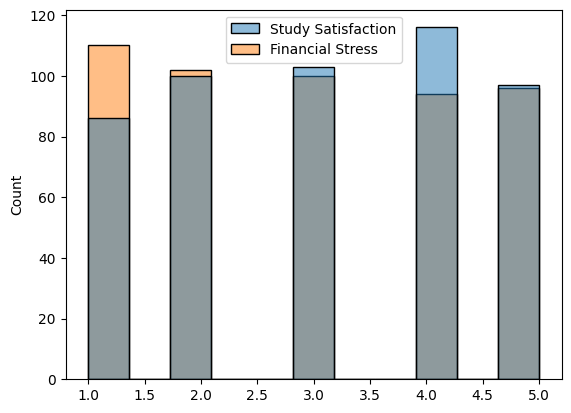

In [ ]:
sns.histplot(df[['Study Satisfaction','Financial Stress']])
plt.show()

Есть ли связь между баллами студента за разные экзамены?

Построим матрицу корреляций для ответа на этот вопрос.

Коэффициент корреляции $\rho$ - это мера взаимосвязи между двумя величинами (корреляция Пирсона - мера линейной зависимости).

$-1 \leq \rho \leq 1$

Чем больше **по модулю** коэффициент корреляции $\rho$ - тем больше взаимосвязь между величинами.

<Axes: >

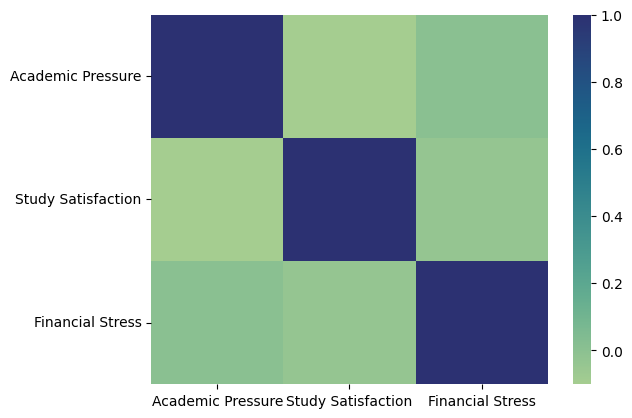

In [ ]:
corr = df[['Academic Pressure','Study Satisfaction', 'Financial Stress']].corr()

sns.heatmap(corr, cmap="crest")

Зависимость есть!

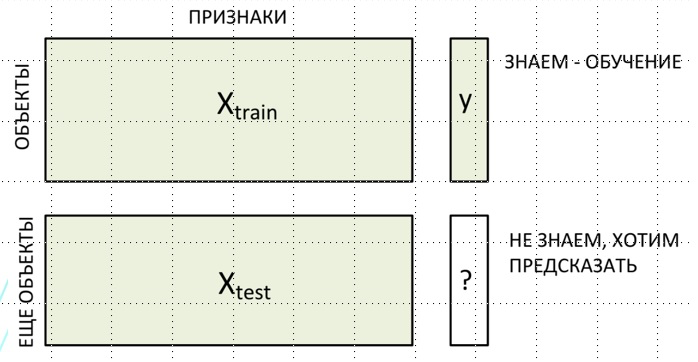